In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net4
from utils import train, test

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net4().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
       BatchNorm2d-2            [-1, 8, 28, 28]              16
              ReLU-3            [-1, 8, 28, 28]               0
            Conv2d-4           [-1, 16, 28, 28]           1,152
       BatchNorm2d-5           [-1, 16, 28, 28]              32
              ReLU-6           [-1, 16, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             128
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9            [-1, 8, 12, 12]             576
      BatchNorm2d-10            [-1, 8, 12, 12]              16
             ReLU-11            [-1, 8, 12, 12]               0
           Conv2d-12           [-1, 16, 10, 10]           1,152
      BatchNorm2d-13           [-1, 16, 10, 10]              32
             ReLU-14           [-1, 16,

In [ ]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [ ]:
model = Net4().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=0.0727 Batch_id=468 Accuracy=91.39: 100%|██████████| 469/469 [00:23<00:00, 19.81it/s]


Test set: Average loss: 0.0849, Accuracy: 9756/10000 (97.56%)

Epoch 2


Train: Loss=0.0786 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:19<00:00, 24.08it/s]


Test set: Average loss: 0.0520, Accuracy: 9846/10000 (98.46%)

Epoch 3


Train: Loss=0.0888 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:20<00:00, 23.12it/s]


Test set: Average loss: 0.0465, Accuracy: 9852/10000 (98.52%)

Epoch 4


Train: Loss=0.1685 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:20<00:00, 23.40it/s]


Test set: Average loss: 0.0421, Accuracy: 9866/10000 (98.66%)

Epoch 5


Train: Loss=0.0231 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:20<00:00, 23.40it/s]


Test set: Average loss: 0.0391, Accuracy: 9875/10000 (98.75%)

Epoch 6


Train: Loss=0.0261 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:19<00:00, 24.16it/s]


Test set: Average loss: 0.0374, Accuracy: 9888/10000 (98.88%)

Epoch 7


Train: Loss=0.0424 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:19<00:00, 23.70it/s]


Test set: Average loss: 0.0368, Accuracy: 9879/10000 (98.79%)

Epoch 8


Train: Loss=0.0092 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:21<00:00, 22.14it/s]


Test set: Average loss: 0.0386, Accuracy: 9881/10000 (98.81%)

Epoch 9


Train: Loss=0.0066 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:20<00:00, 23.02it/s]


Test set: Average loss: 0.0394, Accuracy: 9877/10000 (98.77%)

Epoch 10


Train: Loss=0.0161 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:20<00:00, 23.21it/s]


Test set: Average loss: 0.0322, Accuracy: 9890/10000 (98.90%)

Epoch 11


Train: Loss=0.0088 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:19<00:00, 24.07it/s]


Test set: Average loss: 0.0330, Accuracy: 9894/10000 (98.94%)

Epoch 12


Train: Loss=0.0125 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:19<00:00, 24.25it/s]


Test set: Average loss: 0.0328, Accuracy: 9898/10000 (98.98%)

Epoch 13


Train: Loss=0.0907 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:20<00:00, 23.01it/s]


Test set: Average loss: 0.0316, Accuracy: 9895/10000 (98.95%)

Epoch 14


Train: Loss=0.0170 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:20<00:00, 22.82it/s]


Test set: Average loss: 0.0346, Accuracy: 9886/10000 (98.86%)

Epoch 15


Train: Loss=0.0180 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:20<00:00, 23.41it/s]


Test set: Average loss: 0.0356, Accuracy: 9885/10000 (98.85%)



Text(0.5, 1.0, 'Test Accuracy')

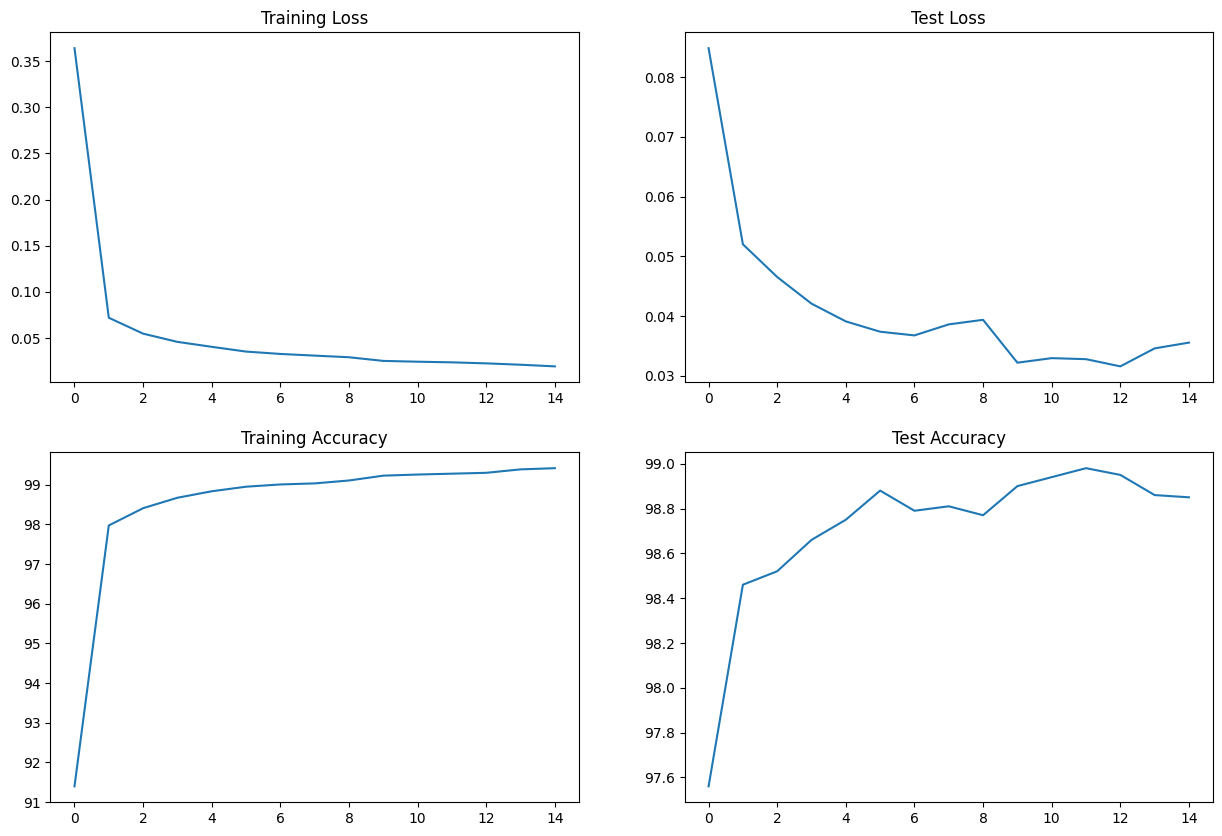

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  99.415
best test accuracy :  98.98
